
# **Moving Average Momentum Strategy Project**

### **September 2022**

This notebook explores a moving average momentum strategy developed as part of a first project in university.
The strategy is based on comparisons between moving averages (MAs) at different intervals:

1. **Acceleration** (shortest interval)
2. **Velocity** (medium interval)
3. **Benchmark** (longest interval)

The idea is to buy when the acceleration MA is higher than the velocity MA, and the velocity MA is higher than the benchmark.

This notebook analyzes how effective this strategy is through a backtest, showcasing the initial code with comments.

### **Contents:**
1. Introduction and Concept
2. Methodology Explanation
3. Backtesting Implementation
4. Results and Observations



## Methodology Explanation

This strategy draws inspiration from various techniques mentioned in financial research. It involves the following steps:

1. **Identify Moving Averages:** Calculate different moving averages (MAs) across the chosen intervals for acceleration, velocity, and benchmark.
2. **Apply Strategy Logic:** Compare the acceleration MA with the velocity and benchmark MAs.
3. **Generate Buy Signal:** When acceleration > velocity > benchmark, initiate a buy signal.
4. **Backtesting:** Simulate the strategy against historical data and evaluate its profitability.

The concept is based on the assumption that shorter moving averages (like acceleration) indicate rapid price changes, which can lead to profitable trading signals.


# **First Project - MA Momentum**

#### **September 2022**

My friend, later to be business partner, and I had just started univeristy and had spent a couple of days researching at the univiersity library for a strategy and gotten familiar with the relevant python libraries. We saw an interesting article about how one could see different intervals for MAs (moving averages) as velocity and acceleration and that the results through a backtest showed 12000% gain over the last year. (Yes, in heinsight we should have been more sceptical.) Nontheless, using the concept, we developed a strategy based on this where if the shortest interval MA  (acceleration) was higher than the middle MA (velocity) and that in turn was higher than a benchmark MA, we would buy.

Being new to the subject, the code below is extremely slow and has a couple of fundamental flaws, but the idea is still there and the code is quite intuitive to read.

I have tried to comment out what everything does, still keeping the code unchanged to show the development over the years.

In [ ]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import math

In [ ]:
pd.set_option('mode.chained_assignment', None)


# Initialise the data
long_MA = 200
short_MA = 17
initial_wealth = '1000'
stock = 'SPY'
period = '60d'
start_date =  '2015-01-01'
end_date = '2020-12-31'
interval = '1d'
totalprofit = 0

In [ ]:
def get_stock_data(stock,startdate,enddate,period,interval):
    ticker = stock
    yf.pdr_override()
    df = yf.download(tickers=stock, start=startdate, end=enddate, interval=interval,period=period)
    df.reset_index(inplace=True)
    df['date'] = df['Date'].dt.date
    return df
"""
I remember that it took a suprisingly long time to figure out that the download_stock_data-function
should be placed outside the for loop to decrease run time.
"""
for x in range(30,150):
    for y in range(20,x):
        for z in range(5,y):
            print(x,y,z)
            long_MA = x
            short_MA = y
            super_MA= z
            initial_wealth = '1000'
            stock = 'SPY'
            period = 'max'
            start_date =  '2018-09-25'
            end_date = '2022-09-30'
            interval = '1d'
            totalprofit = 0

            def ma_strategy(df,short_MA,long_MA,super_MA):

                # Calculating the MAs
                df['l_MA_120'] = df['Close'].rolling(int(long_MA)).mean()
                df['l_MA_80'] = df['Close'].rolling(int(super_MA)).mean()
                df['l_MA_40'] = df['Close'].rolling(int(short_MA)).mean()

                # Converting to booleans to find the crossovers for the different data points (but in this case the buy and sell date is not shifted properly)
                df['a']=np.where(df['l_MA_120'] < df['l_MA_80'],1.0,0.0)
                df['b']=np.where(df['l_MA_80'] < df['l_MA_40'],1.0,0.0)

                df['c']=np.where((df['l_MA_40'] - df['l_MA_80'] )> (df['l_MA_80'] - df['l_MA_120']),1.0, 0.0)
                df['crosszero']=np.where(df['l_MA_120'] < df['l_MA_80'],1.0,0.0)

                df['a1']=np.where(df['l_MA_120'] > df['l_MA_80'],1.0,0.0)
                df['b1']=np.where(df['l_MA_80'] > df['l_MA_40'],1.0,0.0)

                df['c1']=np.where((df['l_MA_40'] - df['l_MA_80'] )< (df['l_MA_80'] - df['l_MA_120']),1.0, 0.0)

                # Logic to calculate buy and sell days
                for i, row in df.iterrows():
                    a=0
                    if df.loc[i,'a'] == 1:

                        if df.loc[i,'b'] == 1:

                            if df.loc[i,'c'] == 1:

                                a=1
                                df['crosszero'].iloc[i]=a
                    elif df.loc[i,'a1'] == 1:

                        if df.loc[i,'b1'] == 1:

                            if df.loc[i,'c1'] == 1:

                                a=-1
                                df['crosszero'].iloc[i]=a
                    else: df['crosszero'].iloc[i]=a

                df['position'] = df['crosszero'].diff()
                df['position'].iloc[-1] = -1

                # Buy and sell positions

                for i, row in df.iterrows():
                    if df.loc[i,'position'] == 1 and df.loc[i,'crosszero']==1:
                            buy_price = round(df.loc[i,'Close'],2)
                            df.loc[i,'buy'] = buy_price
                    if df.loc[i,'position'] == -1 and df.loc[i,'crosszero']==0:
                            sell_price = round(df.loc[i,'Close'],2)
                            df.loc[i,'sell'] = sell_price
                    if df.loc[i,'position'] == -1 and df.loc[i,'crosszero']==-1:
                            short_price = round(df.loc[i,'Close'],2)
                            df.loc[i,'short_price'] = short_price
                    if df.loc[i,'position'] == 1 and df.loc[i,'crosszero']==0:
                            short_sell = round(df.loc[i,'Close'],2)
                            df.loc[i,'short_sell'] = short_sell
                    if df.loc[i,'position'] == -2:
                        sell_price = round(df.loc[i,'Close'],2)
                        df.loc[i,'sell'] = sell_price

                        short_price = round(df.loc[i,'Close'],2)
                        df.loc[i,'short_price'] = short_price

                    if df.loc[i,'position'] == 2:
                        short_sell = round(df.loc[i,'Close'],2)
                        df.loc[i,'short_sell'] = short_sell

                        buy_price = round(df.loc[i,'Close'],2)
                        df.loc[i,'buy'] = buy_price
                    else:
                        pass

                return df


            def backtest(df,stock,startdate,enddate,initial_wealth) :

                    initial_wealth = int(initial_wealth)
                    profitloss = 0
                    position = 0
                    total_profit = 0
                    qty = 0
                    balance = initial_wealth
                    buy_p = 0 # per share
                    total_buy_p = 0
                    total_sell_p = 0
                    MA_wealth = initial_wealth # moving average wealth
                    LT_wealth = initial_wealth # long-term wealth
                    inital_sell = 0

                    df['position'].iloc[-1]=-1

                    for i,row in df.iterrows():
                        #buy
                        if df.loc[i,'position'] == 1.0 and df.loc[i,'crosszero']==1.0:
                            buy_p =round( df.loc[i,'Close'],2)

                            buy_d = df.loc[i,'Date']
                            qty = balance / buy_p
                            qty = math.trunc(qty)
                            balance=balance-(buy_p*qty)
                            MA_wealth=buy_p*qty+balance
                            df.loc[i,'MA_wealth'] = MA_wealth

                            position='buy'
                        #sell
                        if df.loc[i,'position'] == -1 and df.loc[i,'crosszero']==0:
                            sell_p = round(df.loc[i,'Close'],2)
                            sell_price = round(df.loc[i,'sell'],2)
                            sell_d = df.loc[i,'Date']
                            balance= balance+qty*sell_p
                            MA_wealth=balance
                            #print('{:^7}{}{:^15}{}{:^15}{:^15}{:^15}{:^15}'.format(i,buy_d,buy_p,sell_d,sell_p,MA_wealth,qty,round(sell_p-buy_p,2)))

                            position='hold'
                        #short
                        if df.loc[i,'position'] == -1.0 and df.loc[i,'crosszero']==-1:
                            short_p=round( df.loc[i,'Close'],2)

                            short_d=df.loc[i,'Date']
                            qty=balance/short_p
                            qty=math.trunc(qty)
                            MA_wealth=balance
                            df.loc[i,'MA_wealth'] = MA_wealth
                            balance=balance-(short_p*qty)

                            position='short'
                        #buyback
                        if df.loc[i,'position'] == 1 and df.loc[i,'crosszero']==0:
                            buyback_p=round( df.loc[i,'Close'],2)

                            buyback_d=df.loc[i,'Date']
                            balance=balance+((2*short_p*qty)-(buyback_p)*qty)
                            MA_wealth=balance
                            df.loc[i,'MA_wealth'] = MA_wealth
                            #print('{:^7}{}{:^15}{}{:^15}{:^15}{:^15}{:^15}'.format(i,short_d,short_p,buyback_d,buyback_p,MA_wealth,qty,round(short_p-buyback_p,2) ))
                            position='hold'

                        #sell+short
                        if df.loc[i,'position'] == -2:
                            sell_p = round(df.loc[i,'Close'],2)
                            sell_d = df.loc[i,'Date']
                            balance= balance+qty*sell_p
                            MA_wealth=balance
                            df.loc[i,'MA_wealth'] = MA_wealth
                            #print('{:^7}{}{:^15}{}{:^15}{:^15}{:^15}{:^15}'.format(i,buy_d,buy_p,sell_d,sell_p,MA_wealth,qty,round(sell_p-buy_p,2)))
                            short_p=round( df.loc[i,'Close'],2)
                            short_d=df.loc[i,'Date']
                            qty=balance/short_p
                            qty=math.trunc(qty)
                            balance=balance-(short_p*qty)

                            position='short'
                        #buyback+buy
                        if df.loc[i,'position'] == 2:
                            buyback_p=round( df.loc[i,'Close'],2)

                            buyback_d=df.loc[i,'Date']
                            balance=balance+((2*short_p*qty)-(buyback_p)*qty)
                            MA_wealth=balance
                            df.loc[i,'MA_wealth'] = MA_wealth
                            #print('{:^7}{}{:^15}{}{:^15}{:^15}{:^15}{:^15}'.format(i,short_d,short_p,buyback_d,buyback_p,MA_wealth,qty,round(short_p-buyback_p,2)))
                            buy_p =round( df.loc[i,'Close'],2)
                            buy_d = df.loc[i,'Date']
                            qty = balance / buy_p
                            qty = math.trunc(qty)
                            balance=balance-(buy_p*qty)

                            position='buy'

                        #Strategy wealth when bought
                        if position=='buy':
                            price = df.loc[i,'Close']
                            stockprice = price * qty
                            MA_wealth = balance + stockprice
                            df.loc[i,'MA_wealth'] = MA_wealth

                        #Strategy wealth when no position
                        if position=='hold':
                            df.loc[i,'MA_wealth'] = balance

                        #Strategy wealth when shorting
                        if position=='short':
                            price=df.loc[i,'Close']
                            stockprice = price * qty
                            short= short_p-price
                            df.loc[i,'MA_wealth']=((price+short)*qty)+balance






                    first_date = df['Date'].iloc[0]
                    initial_price = df['Close'].iloc[0]
                    qty = LT_wealth/initial_price

                    for i,row in df.iterrows():
                        df.loc[i,'LT_wealth'] = df.loc[i,'Close'] * qty
                        df.loc[i,'Delta_wealth']=df.loc[i,'MA_wealth']-df.loc[i,'LT_wealth']

                    with open('file_to_save4.txt', 'a') as open_file:
                                open_file.write('{}   {} {} {} \n'.format(str(df['Delta_wealth'].max()),str(x),str(y),str(z)))


                    last_date = df['Date'].iloc[-1]
                    final_price = df['Close'].iloc[-1]

                    df.drop(df.tail(1).index,inplace=True)
                    LT_buy_p = initial_price * qty
                    LT_sell_p = final_price * qty
                    LT_profitloss = LT_sell_p - initial_wealth
                    LT_wealth = initial_wealth + LT_profitloss
                    MA_profitloss = df['MA_wealth'].iloc[-1] - initial_wealth
                    MA_profitloss = round(MA_profitloss,2)
                    LT_profitloss = round(LT_profitloss,2)

                    #print('-'*100)
                    #print('Delta MA stategy Profit/Loss: ${:,}, Buy and Hold Profit/Loss: ${:,}'.format(MA_profitloss,LT_profitloss))
                    #print('')
                    #print('Delta MA stategy Final Wealth: ${:,.2f}, Buy and Hold  Final Wealth: ${:,.2f}'.format(df['MA_wealth'].iloc[-1],LT_wealth))
                    #print('-'*100)

                    return df

            def graph(df,stock):
                fig = plt.figure(figsize = [15,6])
                ax = plt.subplot(1,1,1)
                ax.plot(df['Date'], df['l_MA_120'], label = 'long MA')
                ax.plot(df['Date'], df['l_MA_80'], color = 'orange', label = 'short MA')
                ax.plot(df['Date'], df['l_MA_40'], color = 'blue', label = 'super MA')
                ax.plot(df['Date'], df['Close'], color = 'black', label = 'Close')
                ax.plot(df['Date'], df['buy'], color = 'green', label = 'Buy',marker = '^')
                ax.plot(df['Date'], df['short_price'], color = 'blue', label = 'Short',marker = 'v')
                ax.plot(df['Date'], df['short_sell'], color = 'orange', label = 'Buyback',marker = '^')
                ax.plot(df['Date'], df['sell'], color = 'red', label = 'Sell',marker = 'v')

                ax.legend(loc = 'upper right')
                ax.set_xlabel('Date')
                ax.set_title(stock)
                #plt.show()


                fig = plt.figure(figsize = [15,6])
                ax = plt.subplot(1,1,1)
                ax.plot(df['Date'], df['MA_wealth'], color = 'black', label = 'Delta MA Strategy wealth')
                ax.plot(df['Date'], df['LT_wealth'], color = 'red', label = 'buy and hold wealth')
                ax.plot(df['Date'], df['Delta_wealth'], color = 'blue', label = '∆')
                ax.legend(loc = 'upper left')
                ax.set_xlabel('date')
                ax.set_title(stock)
                #plt.show()

            df = get_stock_data(stock,start_date,end_date,period,interval)
            df = ma_strategy(df,long_MA,short_MA,super_MA)
            df = backtest(df,stock,start_date,end_date, initial_wealth)

            #graph(df,stock)





We initially loved the the results, but became sceptical. I remember that we were in class discussing how the graph could be positive. And we came to the conclusion that it indeed must be noise that we had caught in our finance net. Good conclusion.

## Below, the curious reader can see one of the graphs that we saw at the time. (This was a unused sample that was considered bad):


[*********************100%%**********************]  1 of 1 completed


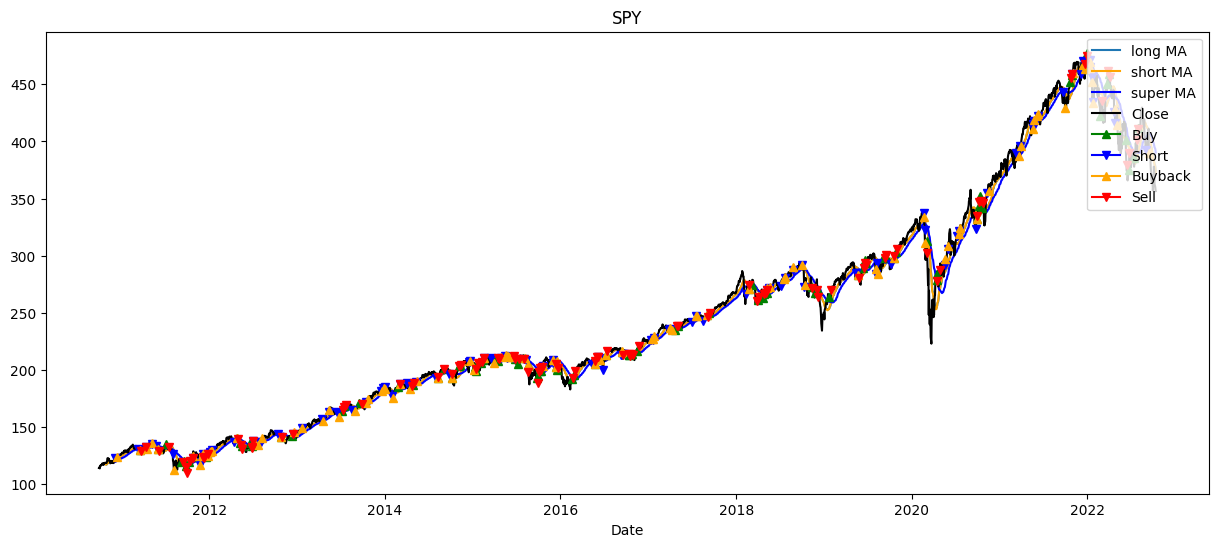

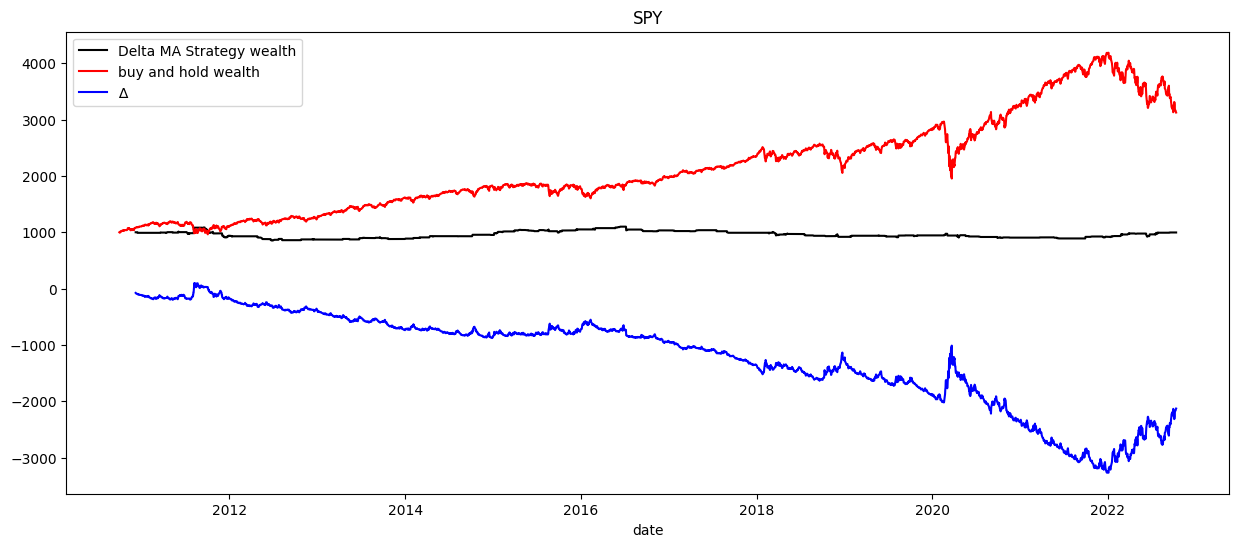

In [ ]:
"""
This code remains untouched
"""

long_MA = 42
short_MA = 23
super_MA= 22
initial_wealth = '1000'
stock = 'SPY'
period = 'max'
start_date =  '2010-09-30'
end_date = '2022-10-14'
interval = '1d'
totalprofit = 0

def get_stock_data(stock,startdate,enddate,period,interval):
        ticker = stock
        yf.pdr_override()
        df = yf.download(tickers=stock, start=startdate, end=enddate, interval=interval,period=period)
        df.reset_index(inplace=True)
        df['date'] = df['Date'].dt.date

        return df



def ma_strategy(df,short_MA,long_MA,super_MA):
    df['l_MA_120'] = df['Close'].rolling(int(long_MA)).mean()
    df['l_MA_80'] = df['Close'].rolling(int(super_MA)).mean()
    df['l_MA_40'] = df['Close'].rolling(int(short_MA)).mean()
    df['a']=np.where(df['l_MA_120'] < df['l_MA_80'],1.0,0.0)
    df['b']=np.where(df['l_MA_80'] < df['l_MA_40'],1.0,0.0)

    df['c']=np.where((df['l_MA_40'] - df['l_MA_80'] )> (df['l_MA_80'] - df['l_MA_120']),1.0, 0.0)
    df['crosszero']=np.where(df['l_MA_120'] < df['l_MA_80'],1.0,0.0)

    df['a1']=np.where(df['l_MA_120'] > df['l_MA_80'],1.0,0.0)
    df['b1']=np.where(df['l_MA_80'] > df['l_MA_40'],1.0,0.0)

    df['c1']=np.where((df['l_MA_40'] - df['l_MA_80'] )< (df['l_MA_80'] - df['l_MA_120']),1.0, 0.0)
    df['cross long']=np.where((df['a']-df['b']-df['c']==-1),1,0)
    df['cross short']=np.where((df['a1']-df['b1']-df['c1'])==-1,-1,0)

    df['crosszero']=df['cross long']+df['cross short']


    df['position'] = df['crosszero'].diff()
    df['position'].iloc[-1] = -1

    for i, row in df.iterrows():
        if df.loc[i,'position'] == 1 and df.loc[i,'crosszero']==1:
                buy_price = round(df.loc[i,'Close'],2)
                df.loc[i,'buy'] = buy_price
        if df.loc[i,'position'] == -1 and df.loc[i,'crosszero']==0:
                sell_price = round(df.loc[i,'Close'],2)
                df.loc[i,'sell'] = sell_price
        if df.loc[i,'position'] == -1 and df.loc[i,'crosszero']==-1:
                short_price = round(df.loc[i,'Close'],2)
                df.loc[i,'short_price'] = short_price
        if df.loc[i,'position'] == 1 and df.loc[i,'crosszero']==0:
                short_sell = round(df.loc[i,'Close'],2)
                df.loc[i,'short_sell'] = short_sell
        if df.loc[i,'position'] == -2:
            sell_price = round(df.loc[i,'Close'],2)
            df.loc[i,'sell'] = sell_price

            short_price = round(df.loc[i,'Close'],2)
            df.loc[i,'short_price'] = short_price
        if df.loc[i,'position'] == 2:
            short_sell = round(df.loc[i,'Close'],2)
            df.loc[i,'short_sell'] = short_sell

            buy_price = round(df.loc[i,'Close'],2)
            df.loc[i,'buy'] = buy_price
        else:
            pass

    return df


def backtest(df,stock,startdate,enddate,initial_wealth) :

        initial_wealth = int(initial_wealth)
        profitloss = 0
        position = 0
        total_profit = 0
        qty = 0
        balance = initial_wealth
        buy_p = 0 # per share
        total_buy_p = 0
        total_sell_p = 0
        MA_wealth = initial_wealth # moving average wealth
        LT_wealth = initial_wealth # long-term wealth
        inital_sell = 0
        counter=0

        df['position'].iloc[-1]=-1

        for i,row in df.iterrows():

            if df.loc[i,'position'] == 1.0 and df.loc[i,'crosszero']==1.0:
                buy_p =round( df.loc[i,'Close'],2)

                buy_d = df.loc[i,'Date']
                qty = balance / buy_p
                qty = math.trunc(qty)
                balance=balance-(buy_p*qty)
                MA_wealth=buy_p*qty+balance
                df.loc[i,'MA_wealth'] = MA_wealth

                position='buy'
            #sell
            if df.loc[i,'position'] == -1 and df.loc[i,'crosszero']==0:
                sell_p = round(df.loc[i,'Close'],2)
                sell_price = round(df.loc[i,'sell'],2)
                sell_d = df.loc[i,'Date']
                balance= balance+qty*sell_p
                MA_wealth=balance

                #print('{:^7}{}{:^15}{}{:^15}{:^15}{:^15}{:^15}'.format(i,buy_d,buy_p,sell_d,sell_p,MA_wealth,qty,round(((sell_p/buy_p)-1)*100,2)))
                position='hold'
            #short
            if df.loc[i,'position'] == -1.0 and df.loc[i,'crosszero']==-1:
                short_p=round( df.loc[i,'Close'],2)
                short_d=df.loc[i,'Date']
                qty=balance/short_p
                qty=math.trunc(qty)
                MA_wealth=balance
                df.loc[i,'MA_wealth'] = MA_wealth
                balance=balance-(short_p*qty)

                position='short'
            #buyback
            if df.loc[i,'position'] == 1 and df.loc[i,'crosszero']==0:
                buyback_p=round( df.loc[i,'Close'],2)
                buyback_d=df.loc[i,'Date']
                balance=balance+((2*short_p*qty)-(buyback_p)*qty)
                MA_wealth=balance
                df.loc[i,'MA_wealth'] = MA_wealth

                #print('{:^7}{}{:^15}{}{:^15}{:^15}{:^15}{:^15}'.format(i,short_d,short_p,buyback_d,buyback_p,MA_wealth,qty,round(((short_p/buyback_p)-1)*100,2) ))
                position='hold'

            #sell+short
            if df.loc[i,'position'] == -2:
                sell_p = round(df.loc[i,'Close'],2)
                sell_d = df.loc[i,'Date']
                balance= balance+qty*sell_p
                MA_wealth=balance
                df.loc[i,'MA_wealth'] = MA_wealth

                #print('{:^7}{}{:^15}{}{:^15}{:^15}{:^15}{:^15}'.format(i,buy_d,buy_p,sell_d,sell_p,MA_wealth,qty,round(((sell_p/buy_p)-1)*100,2)))
                short_p=round( df.loc[i,'Close'],2)
                short_d=df.loc[i,'Date']
                qty=balance/short_p
                qty=math.trunc(qty)
                balance=balance-(short_p*qty)

                position='short'
            #buyback+buy
            if df.loc[i,'position'] == 2:
                buyback_p=round( df.loc[i,'Close'],2)
                buyback_d=df.loc[i,'Date']
                balance=balance+((2*short_p*qty)-(buyback_p)*qty)
                MA_wealth=balance
                df.loc[i,'MA_wealth'] = MA_wealth

                #print('{:^7}{}{:^15}{}{:^15}{:^15}{:^15}{:^15}'.format(i,short_d,short_p,buyback_d,buyback_p,MA_wealth,qty,round(((short_p/buyback_p)-1)*100,2)))
                buy_p =round( df.loc[i,'Close'],2)
                buy_d = df.loc[i,'Date']
                qty = balance / buy_p
                qty = math.trunc(qty)
                balance=balance-(buy_p*qty)

                position='buy'

            #Strategy wealth when bought
            if position=='buy':
                price = df.loc[i,'Close']
                stockprice = price * qty
                MA_wealth = balance + stockprice
                df.loc[i,'MA_wealth'] = MA_wealth

            #Strategy wealth when no position
            if position=='hold':
                df.loc[i,'MA_wealth'] = balance

            #Strategy wealth when shorting
            if position=='short':
                price=df.loc[i,'Close']
                stockprice = price * qty
                short= short_p-price
                df.loc[i,'MA_wealth']=((price+short)*qty)+balance

        first_date = df['Date'].iloc[0]
        initial_price = df['Close'].iloc[0]
        qty = LT_wealth/initial_price

        for i,row in df.iterrows():
            df.loc[i,'LT_wealth'] = df.loc[i,'Close'] * qty
            df.loc[i,'Delta_wealth']=df.loc[i,'MA_wealth']-df.loc[i,'LT_wealth']

        last_date = df['Date'].iloc[-1]
        final_price = df['Close'].iloc[-1]

        df.drop(df.tail(1).index,inplace=True)
        LT_buy_p = initial_price * qty
        LT_sell_p = final_price * qty
        LT_profitloss = LT_sell_p - initial_wealth
        LT_wealth = initial_wealth + LT_profitloss
        MA_profitloss = df['MA_wealth'].iloc[-1] - initial_wealth
        MA_profitloss = round(MA_profitloss,2)
        LT_profitloss = round(LT_profitloss,2)

        #print('-'*100)
        #print('Delta MA stategy Profit/Loss: ${:,}, Buy and Hold Profit/Loss: ${:,}'.format(MA_profitloss,LT_profitloss))
        #print('')
        #print('Delta MA stategy Final Wealth: ${:,.2f}, Buy and Hold  Final Wealth: ${:,.2f}'.format(df['MA_wealth'].iloc[-1],LT_wealth))
        #print('-'*100)
        #print( df['Delta_wealth'].max())
        return df

def graph(df,stock):
    fig = plt.figure(figsize = [15,6])
    ax = plt.subplot(1,1,1)
    ax.plot(df['Date'], df['l_MA_120'], label = 'long MA')
    ax.plot(df['Date'], df['l_MA_80'], color = 'orange', label = 'short MA')
    ax.plot(df['Date'], df['l_MA_40'], color = 'blue', label = 'super MA')
    ax.plot(df['Date'], df['Close'], color = 'black', label = 'Close')
    ax.plot(df['Date'], df['buy'], color = 'green', label = 'Buy',marker = '^')
    ax.plot(df['Date'], df['short_price'], color = 'blue', label = 'Short',marker = 'v')
    ax.plot(df['Date'], df['short_sell'], color = 'orange', label = 'Buyback',marker = '^')
    ax.plot(df['Date'], df['sell'], color = 'red', label = 'Sell',marker = 'v')

    ax.legend(loc = 'upper right')
    ax.set_xlabel('Date')
    ax.set_title(stock)
    plt.show()

    fig = plt.figure(figsize = [15,6])
    ax = plt.subplot(1,1,1)
    ax.plot(df['Date'], df['MA_wealth'], color = 'black', label = 'Delta MA Strategy wealth')
    ax.plot(df['Date'], df['LT_wealth'], color = 'red', label = 'buy and hold wealth')
    ax.plot(df['Date'], df['Delta_wealth'], color = 'blue', label = '∆')
    ax.legend(loc = 'upper left')
    ax.set_xlabel('date')
    ax.set_title(stock)
    plt.show()

df = get_stock_data(stock,start_date,end_date,period,interval)
df = ma_strategy(df,long_MA,short_MA,super_MA)
df = backtest(df,stock,start_date,end_date, initial_wealth)
graph(df,stock)



